# 0. Setup

In [1]:
import pytorch3d as p3d
import torch
from starter.utils import get_mesh_renderer

/root/anaconda3/envs/ml3d/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
renderer = get_mesh_renderer(image_size=512)

In [3]:
vertices = torch.tensor([[[0.0, 0.0, 0.0],
                          [1.0, 0.0, 0.0],
                          [0.0, 1.0, 0.0]]])  # 1 x N_v x 3 tensor.
faces = torch.tensor([[[0, 1, 2]]])  # 1 x N_f x 3 tensor.
textures =  torch.tensor([[[1.0, 0.0, 0.0],
                             [0.0, 1.0, 0.0],
                             [0.0, 0.0, 1.0]]])  # 1 x N_v x 3 tensor.
meshes = p3d.structures.Meshes(
    verts=vertices,
    faces=faces,
    textures=p3d.renderer.TexturesVertex(textures),
)

In [4]:
cameras = p3d.renderer.FoVPerspectiveCameras(
    R=torch.eye(3).unsqueeze(0),
    T=torch.tensor([[0.0, 0.0, 3.0]]),
    fov=60.0,
)

In [5]:
lights = p3d.renderer.PointLights(location=[[0.0, 0.0, -3.0]])
rend = renderer(meshes, cameras=cameras, lights=lights)
image = rend[0, ..., :3].numpy()

# 1. Practicing with Cameras (15 Points)

In [6]:
import pytorch3d as p3d
import numpy as np
from tqdm import tqdm
import imageio
from starter.utils import get_mesh_renderer

def camera360(mesh, img_size=256, num_frames=36, duration=1000, distance=3.0, elevation=15.0, output_path=None):
    renderer = get_mesh_renderer(img_size)

    duration //= num_frames  # duration per frame in milliseconds
    degrees = np.linspace(0, 360, num=num_frames).tolist()
    my_images = []

    # lights = p3d.renderer.PointLights(location=[[0.0, 0.0, -3.0]])

    for angle in tqdm(degrees):
        R, T = p3d.renderer.cameras.look_at_view_transform(distance, elevation, angle)
        cameras = p3d.renderer.FoVPerspectiveCameras(R=R, T=T, fov=60.0)
        lights = p3d.renderer.PointLights(location=cameras.get_camera_center())
        rend = renderer(mesh, cameras=cameras, lights=lights)
        image = rend[0, ..., :3].numpy()
        my_images.append((image * 255).astype(np.uint8))

    if output_path is not None:
        imageio.mimsave(output_path, my_images, duration=duration, loop=0)
        return None
    else:
        return my_images

## 1.1. 360-degree Renders (5 points)

In [7]:
import pytorch3d as p3d

cow_mesh = p3d.io.load_objs_as_meshes(["data/cow.obj"])
camera360(cow_mesh, output_path="output/cow-360.gif")

  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [00:23<00:00,  1.56it/s]


Result:

![360-degree renders of the cow](output/cow-360.gif)

## 1.2 Re-creating the Dolly Zoom (10 points)

In [8]:
# python -m starter.dolly_zoom --duration 30 --num_frames 100

Result:

![Dolly Zoom Effect](output/dolly.gif)

# 2. Practicing with Meshes (10 Points)

## 2.1 Constructing a Tetrahedron (5 points)

In [9]:
import pytorch3d as p3d
import torch

points = torch.tensor([[
    [0.0, 0.0, -1.0],
    [0.0, 0.0, 1.0],
    [1.0, 1.0, 1.0],
    [1.0, -1.0, 1.0],
]])
faces = torch.tensor([[
    [0, 1, 2],
    [0, 1, 3],
    [1, 2, 3],
    [0, 2, 3],
]])
textures = torch.tensor([[
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
    [1.0, 0.0, 1.0],
]])
textures = textures[:, :, None, None, :]

tetrahedron = p3d.structures.Meshes(
    verts=points,
    faces=faces,
    textures=p3d.renderer.TexturesAtlas(textures)
)

camera360(tetrahedron, num_frames=100, duration=2000, output_path="output/tetrahedron.gif")

100%|██████████| 100/100 [00:02<00:00, 49.14it/s]


Result:

- Number of vertices: 4
- Number of faces: 4

![](output/tetrahedron.gif)

## 2.2 Constructing a Cube (5 points)

In [10]:
import pytorch3d as p3d
import torch

points = torch.tensor([[
    [-1.0, -1.0, -1.0],
    [-1.0, -1.0, 1.0],
    [-1.0, 1.0, -1.0],
    [-1.0, 1.0, 1.0],
    [1.0, -1.0, -1.0],
    [1.0, -1.0, 1.0],
    [1.0, 1.0, -1.0],
    [1.0, 1.0, 1.0],
]])
faces = torch.tensor([[
    [0, 4, 5],
    [0, 5, 1],
    [4, 6, 7],
    [4, 7, 5],
    [6, 2, 3],
    [6, 3, 7],
    [2, 0, 1],
    [2, 1, 3],
    [1, 5, 7],
    [1, 7, 3],
    [2, 6, 4],
    [2, 4, 0],
]])
textures = torch.tensor([[
    [1.0, 0.0, 0.0],
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 0.0, 1.0],
    [1.0, 0.0, 1.0],
    [1.0, 0.0, 1.0],
    [1.0, 1.0, 0.0],
    [1.0, 1.0, 0.0],
    [0.0, 1.0, 1.0],
    [0.0, 1.0, 1.0],
]])
textures = textures[:, :, None, None, :]

cube = p3d.structures.Meshes(
    verts=points,
    faces=faces,
    textures=p3d.renderer.TexturesAtlas(textures)
)

camera360(cube, num_frames=100, duration=2000, distance=5, elevation=30, output_path="output/cube.gif")

100%|██████████| 100/100 [00:02<00:00, 47.11it/s]


Result:

- Number of vertices: 8
- Number of triangle faces: 12

![](output/cube.gif)

# 3. Re-texturing a mesh (10 points)

In [11]:
import pytorch3d as p3d
import torch
from starter.utils import load_cow_mesh

vertices, faces = load_cow_mesh('data/cow.obj')

def color_interpolate(color1, color2, alpha):
    return alpha * color2 + (1 - alpha) * color1

z_min = vertices[:, 2].min()
z_max = vertices[:, 2].max()

color1 = torch.tensor([0.0, 0.0, 1.0])  # Blue color
color2 = torch.tensor([1.0, 0.0, 0.0])  # Red color

alphas = (vertices[:, 2] - z_min) / (z_max - z_min)

textures = color_interpolate(color1[None, ...], color2[None, ...], alphas[..., None]).unsqueeze(0)
vertices = vertices.unsqueeze(0)
faces = faces.unsqueeze(0)

cow_mesh = p3d.structures.Meshes(
    verts=vertices,
    faces=faces,
    textures=p3d.renderer.TexturesVertex(textures)
)

camera360(cow_mesh, output_path="output/cow-retexture.gif")

100%|██████████| 36/36 [00:27<00:00,  1.31it/s]


Result:

- Color 1: Blue
- Color 2: Red

![](output/cow-retexture.gif)

# 4. Camera Transformations (10 points)

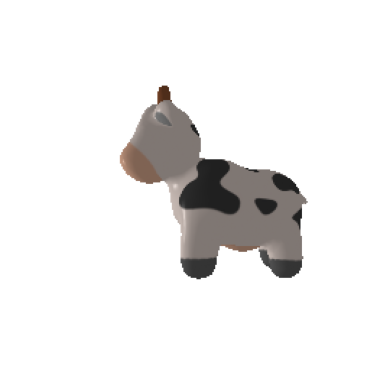

In [12]:
import pytorch3d as p3d
import numpy as np
from starter.camera_transforms import render_textured_cow
import matplotlib.pyplot as plt

R_relative = [
    [[1.0, 0.0, 0.0],
     [0.0, 1.0, 0.0],
     [0.0, 0.0, 1.0]],
    [[0.0, 1.0, 0.0],
     [-1.0, 0.0, 0.0],
     [0.0, 0.0, 1.0]],
    [[1.0, 0.0, 0.0],
     [0.0, 1.0, 0.0],
     [0.0, 0.0, 1.0]],
    [[1.0, 0.0, 0.0],
     [0.0, 1.0, 0.0],
     [0.0, 0.0, 1.0]],
    [[0.0, 0.0, 1.0],
     [0.0, 1.0, 0.0],
     [-1.0, 0.0, 0.0]],
]
T_relative = [
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 3.0],
    [0.5, -0.5, 0.0],
    [-3.0, 0.0, 3.0],
]

plt.ioff()
for i in range(len(R_relative)):
    image = render_textured_cow(cow_path="data/cow.obj", R_relative=R_relative[i], T_relative=T_relative[i])
    plt.imshow(image)
    plt.axis('off')
    plt.imsave(f"output/cow_view_{i}.png", image)
plt.ion()

R_relative and T_relative are another affine transformation pair that defines the camera's pose relative to the cow model.

The formula to compute the new camera extrinsics is:

R_relative and T_relative are another affine transformation pair that defines the camera's pose relative to the cow model.

The formula to compute the new camera extrinsics is:

$$
R_{\text{new}} = R_{\text{relative}}\,R_{\text{cow}} \\
T_{\text{new}} = R_{\text{relative}}\,T_{\text{cow}} + T_{\text{relative}}
$$

The points will be transformed from world coordinates to camera coordinates using the new extrinsics.

$$
P_{\text{camera}} = R_{\text{relative}} \cdot (R_{\text{cow}} \cdot P_{\text{world}} + T_{\text{cow}}) + T_{\text{relative}}
$$

Results:

![](output/cow_view_0.png) ![](output/cow_view_1.png) ![](output/cow_view_2.png) ![](output/cow_view_3.png) ![](output/cow_view_4.png) ![](output/cow_view_5.png)

# 5. Rendering Generic 3D Representations (45 Points)

In [13]:
from starter.utils import get_points_renderer
from tqdm import tqdm
import numpy as np
import imageio

def camera_point_360(point_cloud, img_size=256, num_frames=36, duration=1000, distance=3.0, elevation=15.0, output_path=None):
    points_renderer = get_points_renderer(
        image_size=img_size,
        radius=0.01,
    )

    duration //= num_frames  # duration per frame in milliseconds
    degrees = np.linspace(0, 360, num=num_frames).tolist()
    my_images = []

    for angle in tqdm(degrees):
        R, T = p3d.renderer.cameras.look_at_view_transform(distance, elevation, angle)
        cameras = p3d.renderer.FoVPerspectiveCameras(R=R, T=T, fov=60.0)
        rend = points_renderer(point_cloud, cameras=cameras)
        image = rend[0, ..., :3].numpy()  # (B, H, W, 4) -> (H, W, 3).
        image = np.flipud(image)
        my_images.append((image * 255).astype(np.uint8))

    if output_path is not None:
        imageio.mimsave(output_path, my_images, duration=duration, loop=0)
        return None
    else:
        return my_images

## 5.1 Rendering Point Clouds from RGB-D Images (10 points)

In [14]:
import torch
import pytorch3d as p3d
from starter.render_generic import load_rgbd_data
from starter.utils import unproject_depth_image

data = load_rgbd_data()

points1, rgba1 = unproject_depth_image(
    torch.tensor(data['rgb1']),
    torch.tensor(data['mask1']),
    torch.tensor(data['depth1']),
    data['cameras1'],
)
points2, rgba2 = unproject_depth_image(
    torch.tensor(data['rgb2']),
    torch.tensor(data['mask2']),
    torch.tensor(data['depth2']),
    data['cameras2'],
)

point_cloud1 = p3d.structures.Pointclouds(
    points=[points1],
    features=[rgba1[:, :3]],
)
point_cloud2 = p3d.structures.Pointclouds(
    points=[points2],
    features=[rgba2[:, :3]],
)
point_cloud_unified = p3d.structures.Pointclouds(
    points=[torch.cat([points1, points2], dim=0)],
    features=[torch.cat([rgba1[:, :3], rgba2[:, :3]], dim=0)],
)

camera_point_360(point_cloud1, distance=6.0, duration=2, elevation=0, output_path="output/point_cloud1_360.gif")
camera_point_360(point_cloud2, distance=6.0, duration=2, elevation=0, output_path="output/point_cloud2_360.gif")
camera_point_360(point_cloud_unified, distance=6.0, duration=2, elevation=0, output_path="output/point_cloud_unified_360.gif")

/root/anaconda3/envs/ml3d/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1666642881969/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 36/36 [21:43<00:00, 36.21s/it]


Results:

![](output/point_cloud1_360.gif) ![](output/point_cloud2_360.gif) ![](output/point_cloud_unified_360.gif)

## 5.2 Parametric Functions (10 + 5 points)

In [ ]:
import pytorch3d as p3d
from starter.utils import get_device
import torch
import numpy as np

def torus_pointcloud(num_samples=200, device=None):
    """
    Renders a torus using parametric sampling. Samples num_samples ** 2 points.
    """

    if device is None:
        device = get_device()

    u = torch.linspace(0, 2 * np.pi, num_samples)
    v = torch.linspace(0, 2 * np.pi, num_samples)
    U, V = torch.meshgrid(u, v)
    R, r = 1.0, 0.4

    x = (R + r * torch.cos(V)) * torch.cos(U)
    y = (R + r * torch.cos(V)) * torch.sin(U)
    z = r * torch.sin(V)

    points = torch.stack((x.flatten(), y.flatten(), z.flatten()), dim=1)
    color = (points - points.min()) / (points.max() - points.min())

    torus_point_cloud = p3d.structures.Pointclouds(
        points=[points], features=[color],
    ).to(device)

    return torus_point_cloud

def trefoil_pointcloud(num_samples=200, device=None):
    """
    Renders a trefoil using parametric sampling. Samples num_samples ** 2 points.
    """

    if device is None:
        device = get_device()

    u = torch.linspace(0, 2 * np.pi, num_samples)
    v = torch.linspace(0, 2 * np.pi, num_samples)

    U, V = torch.meshgrid(u, v)
    R = 0.5

    x = R * torch.sin(3 * U) / (2 + torch.cos(V))
    y = R * (torch.sin(U) + 2 * torch.sin(2 * U)) / (2 + torch.cos(V + np.pi * 2 / 3))
    z = R / 2 * (torch.cos(U) - 2 * torch.cos(2 * U)) * (2 + torch.cos(V)) * (2 + torch.cos(V + np.pi * 2 / 3)) / 4

    points = torch.stack((x.flatten(), y.flatten(), z.flatten()), dim=1)
    color = (points - points.min()) / (points.max() - points.min())

    trefoil_point_cloud = p3d.structures.Pointclouds(
        points=[points], features=[color],
    ).to(device)

    return trefoil_point_cloud

camera_point_360(torus_pointcloud(num_samples=100), elevation=0, duration=2, output_path="output/torus_pointcloud.gif")
camera_point_360(trefoil_pointcloud(num_samples=100), elevation=0, duration=2, output_path="output/trefoil_pointcloud.gif")

100%|██████████| 36/36 [00:56<00:00,  1.57s/it]


Result:

![](output/torus_pointcloud.gif) ![](output/trefoil_pointcloud.gif)

## 5.3 Implicit Surfaces (15 + 5 points)

In [ ]:
import mcubes
import pytorch3d as p3d

def torus_mesh(voxel_size=64, device=None):
    if device is None:
        device = get_device()
    min_value = -1.1
    max_value = 1.1

    theta = 45.0 / 180.0 * np.pi
    Rot = torch.tensor([ # rot z-axis
        [np.cos(theta), -np.sin(theta), 0.0],
        [np.sin(theta), np.cos(theta), 0.0],
        [0.0, 0.0, 1.0],
    ], dtype=torch.float32)

    X, Y, Z = torch.meshgrid([torch.linspace(min_value, max_value, voxel_size)] * 3)
    X, Y, Z = torch.matmul(Rot[None, None, None, ...], torch.stack([X, Y, Z], dim=-1)[..., None]).squeeze(-1).permute(3, 0, 1, 2)
    R, r = 0.7, 0.3
    voxels = torch.sqrt(torch.square(torch.sqrt(X**2 + Z**2) - R) + Y**2) - r
    vertices, faces = mcubes.marching_cubes(mcubes.smooth(voxels), isovalue=0)
    vertices = torch.tensor(vertices).float()
    faces = torch.tensor(faces.astype(int))
    # Vertex coordinates are indexed by array position, so we need to
    # renormalize the coordinate system.
    vertices = (vertices / voxel_size) * (max_value - min_value) + min_value
    textures = (vertices - vertices.min()) / (vertices.max() - vertices.min())
    textures = p3d.renderer.TexturesVertex(vertices.unsqueeze(0))

    mesh = p3d.structures.Meshes([vertices], [faces], textures=textures).to(device)
    
    return mesh

def ellipsoid_mesh(voxel_size=64, device=None):
    if device is None:
        device = get_device()
    min_value = -1.1
    max_value = 1.1

    theta = 45.0 / 180.0 * np.pi
    Rot = torch.tensor([ # rot z-axis
        [np.cos(theta), -np.sin(theta), 0.0],
        [np.sin(theta), np.cos(theta), 0.0],
        [0.0, 0.0, 1.0],
    ], dtype=torch.float32)

    X, Y, Z = torch.meshgrid([torch.linspace(min_value, max_value, voxel_size)] * 3)
    X, Y, Z = torch.matmul(Rot[None, None, None, ...], torch.stack([X, Y, Z], dim=-1)[..., None]).squeeze(-1).permute(3, 0, 1, 2)
    rx, ry, rz = 1.0, 0.5, 0.75
    k0 = ((X/rx)**2 + (Y/ry)**2 + (Z/rz)**2)
    k1 = ((X/rx**2)**2 + (Y/ry**2)**2 + (Z/rz**2)**2)
    voxels = k0 * (k0 - 1.0) / k1;
    vertices, faces = mcubes.marching_cubes(mcubes.smooth(voxels), isovalue=0)
    vertices = torch.tensor(vertices).float()
    faces = torch.tensor(faces.astype(int))
    # Vertex coordinates are indexed by array position, so we need to
    # renormalize the coordinate system.
    vertices = (vertices / voxel_size) * (max_value - min_value) + min_value
    textures = (vertices - vertices.min()) / (vertices.max() - vertices.min())
    textures = p3d.renderer.TexturesVertex(vertices.unsqueeze(0))

    mesh = p3d.structures.Meshes([vertices], [faces], textures=textures).to(device)
    
    return mesh

camera360(torus_mesh(), elevation=30, duration=2, output_path="output/torus_mesh.gif")
camera360(ellipsoid_mesh(), elevation=30, duration=2, output_path="output/ellipsoid_mesh.gif")

100%|██████████| 36/36 [01:31<00:00,  2.54s/it]


Results:

![](output/torus_mesh.gif) ![](output/ellipsoid_mesh.gif)

# 6. Do Something Fun (10 points)

"Oiiaioooooiai Cat!!!!!" (https://skfb.ly/pyYNA) by baby_saja is licensed under Creative Commons Attribution (http://creativecommons.org/licenses/by/4.0/).

In [17]:
from pytorch3d.io.experimental_gltf_io import load_meshes as gltf_load_meshes
from pytorch3d.io import IO

io = IO()
data = gltf_load_meshes("data/oiiaioooooiai-cat/source/oiiaioooooiai_cat.glb", io.path_manager)

camera360(data[0][1], img_size=512, num_frames=36, distance=0.9, elevation=25, output_path="output/oiia_cat.gif")

  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [05:09<00:00,  8.61s/it]


Result:

![](output/oiia_cat.gif)

# (Extra Credit) 7. Sampling Points on Meshes (10 points)